In [835]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
from scipy import stats
from src.qualitative_analysis import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [836]:
def calculate_probabilities(X, step):
    prob_dist = stats.norm(loc=0, scale=1)
    noise_dist = stats.norm(loc=0, scale=step)
    pdf_values = prob_dist.pdf(X) * np.sqrt(2 * np.pi)
    noise = noise_dist.rvs(size=X.shape[0]) * ((pdf_values + 0.1) * (1 - pdf_values + 0.1)) ** 1.5 * 10
    noisy_pdf_values = pdf_values + noise
    noisy_pdf_values = np.clip(noisy_pdf_values, 0, 1)
    prob = np.column_stack((1 - noisy_pdf_values, noisy_pdf_values))
    print("avg noise ", np.average(np.abs(noise)))
    return prob

In [837]:
# configurable variables
noise = 0
noises = np.arange(0.09, 0.1, 0.01)
p_true_dist = stats.norm(loc=0, scale=1)
X = p_true_dist.rvs(size=4000)

In [838]:
p_true = util.logisticregression2_probs(X, noise)
y_true = np.array(list(map(lambda x: 1 if random.random() < x[1] else 0, p_true)))

avg noise  0.0


Plotting Predicted Probability Distributions...
avg noise  0.08551522697081265
avg noise  0.09832610996984244


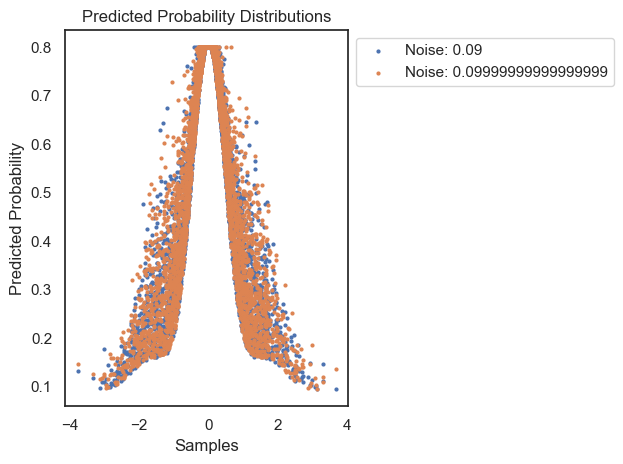

In [839]:
util.plot_p_pred_dists(
    np.arange(0.09, 0.1, 0.01),
    X,
    util.logisticregression2_probs,
    "Noise"
)

Plotting True Probability Reliability Diagram...
avg noise  0.08692796030170703


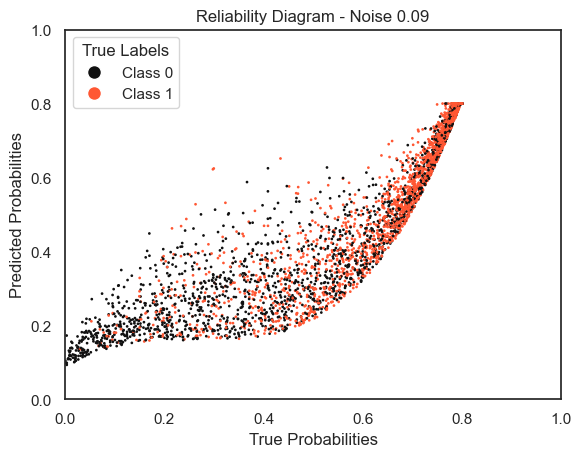

avg noise  0.0963368778061225


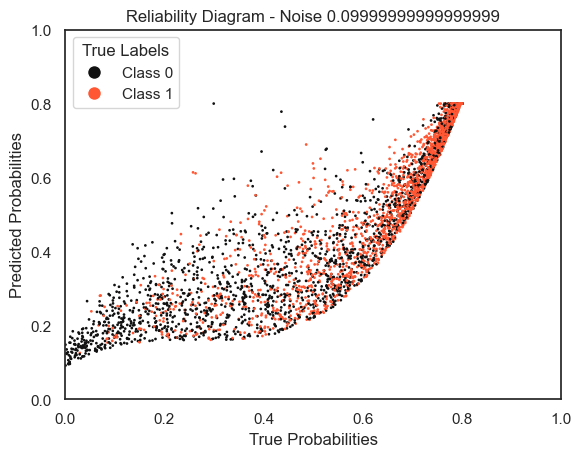

In [840]:
util.plot_p_true_reliability_diagrams(
    np.arange(0.09, 0.1, 0.01),
    X, p_true, y_true,
    util.logisticregression2_probs,
    "Noise"
)

In [841]:
true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals = (
    util.calculate_metrics(
        noise + noises,
        p_true, y_true, X, 
        util.logisticregression2_probs,
        log="Noise"
    )
)

Noise:  0.09
avg noise  0.0869081578157055
True ECE:  0.11049085951426714
ECE:  0.024645274663676633
Balance Score:  -0.022382744
FCE:  0.025
TCE:  0.6975
KSCE:  0.07465679621696475
ACE:  0.03505304271465112
Noise:  0.09999999999999999
avg noise  0.09503509579857382
True ECE:  0.10792921752452661
ECE:  0.024545334570800135
Balance Score:  -0.02155227
FCE:  0.024
TCE:  0.6455
KSCE:  0.06852640342712402
ACE:  0.027581887261192994


Plotting metrics...


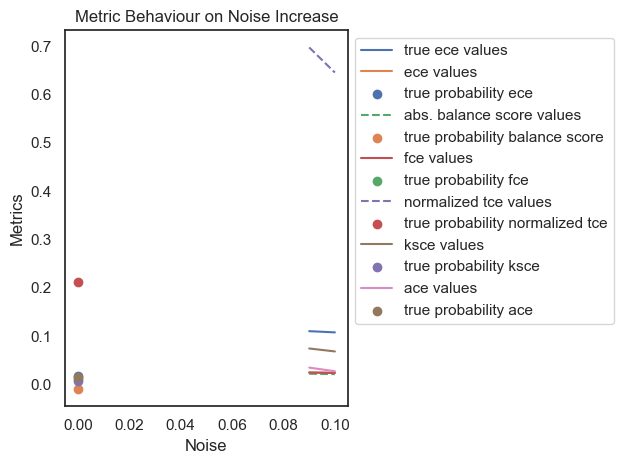

In [842]:
util.plot_metrics(
    noise, noise + noises,
    p_true, y_true,
    true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals,
    "Metric Behaviour on Noise Increase",
    "Noise"
)